In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_label1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/multi_train_label1.csv',index_col=[0,1])
test_label1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/multi_test_label1.csv',index_col=[0,1])

In [3]:
train_group1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/train_group1.csv',index_col=[0,1])
test_group1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/test_group1.csv',index_col=[0,1])

In [4]:
std_train = np.load('/Users/mk2/Desktop/iMa/Model/std_train.npy')
std_test = np.load('/Users/mk2/Desktop/iMa/Model/std_test.npy')

# classifiers without meta-estimator method

## logit 

In [23]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression(max_iter=2000,penalty='l2',solver='lbfgs', tol=1e-7,class_weight = 'balanced', warm_start=False)
logreg.fit(std_train,hot_train_label1)
prediction_logreg = cross_val_predict(logreg, std_test,hot_test_label1, groups=test_group1, cv=200, n_jobs=3)
print(classification_report(test_label1, prediction_logreg))

ValueError: y should be a 1d array, got an array of shape () instead.

In [24]:
cm_logreg = confusion_matrix(test_label1, prediction_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp.plot() 

NameError: name 'prediction_logreg' is not defined

## multi layer perceptron

In [5]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=1000, activation='logistic', solver='adam', 
                   alpha=0.05, batch_size='auto', learning_rate='invscaling', 
                   learning_rate_init=0.001, power_t=0.5, max_iter=500, 
                   shuffle=True, random_state=None, tol=0.0001, verbose=None,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                   early_stopping=True, validation_fraction=0.1, beta_1=0.9, 
                   beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

nn.fit(std_train,train_label1)

prediction_nn = cross_val_predict(nn, std_test,test_label1, groups=test_group1, cv=5, n_jobs=3)
print(classification_report(test_label1, prediction_nn))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           1       0.16      0.60      0.25      1207
           2       0.12      0.01      0.03      1204
           3       0.09      0.00      0.01      1207
           4       0.10      0.20      0.14      1207
           5       0.10      0.07      0.09      1201
           6       0.10      0.01      0.02      1200
           7       0.07      0.02      0.03      1195
           8       0.09      0.19      0.12      1195
           9       0.10      0.11      0.11      1179
          10       0.14      0.01      0.02      1164
          11       0.14      0.15      0.14      1147
          12       0.18      0.21      0.20      1064
          13       0.00      0.00      0.00       529
          14       0.17      0.15      0.16       445

    accuracy                           0.13     15144
   macro avg       0.11      0.12      0.09     15144
weighted avg       0.11      0.13      0.09     15144



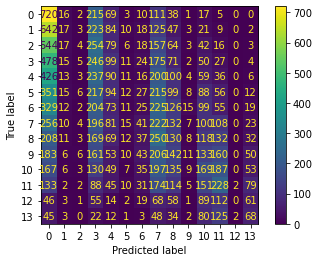

In [6]:
cm_nn = confusion_matrix(test_label1, prediction_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot() 

## gradient boost

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                 min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                 verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                 n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

gbc.fit(std_train,train_label1)

prediction_gbc = cross_val_predict(gbc, std_test,test_label1, groups=test_group1, cv=10, n_jobs=7)
print(classification_report(test_label1, prediction_gbc))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           1       0.24      0.37      0.29      1207
           2       0.12      0.11      0.11      1204
           3       0.11      0.14      0.12      1207
           4       0.10      0.13      0.11      1207
           5       0.11      0.10      0.10      1201
           6       0.08      0.06      0.07      1200
           7       0.09      0.07      0.08      1195
           8       0.10      0.09      0.10      1195
           9       0.09      0.08      0.08      1179
          10       0.10      0.09      0.10      1164
          11       0.12      0.16      0.14      1147
          12       0.17      0.19      0.18      1064
          13       0.17      0.10      0.13       529
          14       0.24      0.16      0.19       445

    accuracy                           0.13     15144
   macro avg       0.13      0.13      0.13     15144
weighted avg       0.12      0.13      0.13     15144



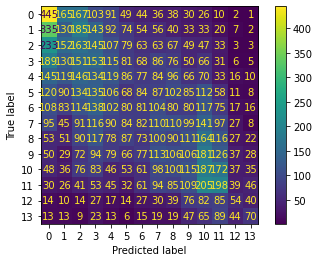

In [8]:
cm_gbc = confusion_matrix(test_label1, prediction_gbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc)
disp.plot() 

## decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                             random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight='balanced', ccp_alpha=0.0)

dtc.fit(std_train,train_label1)

prediction_dtc = cross_val_predict(dtc, std_test,test_label1, groups=test_group1, cv=10, n_jobs=7)
print(classification_report(test_label1, prediction_dtc))

              precision    recall  f1-score   support

           1       0.20      0.19      0.20      1207
           2       0.13      0.12      0.12      1204
           3       0.11      0.10      0.10      1207
           4       0.11      0.10      0.11      1207
           5       0.09      0.08      0.08      1201
           6       0.09      0.09      0.09      1200
           7       0.08      0.08      0.08      1195
           8       0.07      0.07      0.07      1195
           9       0.09      0.09      0.09      1179
          10       0.09      0.09      0.09      1164
          11       0.10      0.11      0.11      1147
          12       0.11      0.11      0.11      1064
          13       0.09      0.10      0.09       529
          14       0.11      0.13      0.12       445

    accuracy                           0.10     15144
   macro avg       0.10      0.10      0.10     15144
weighted avg       0.10      0.10      0.10     15144



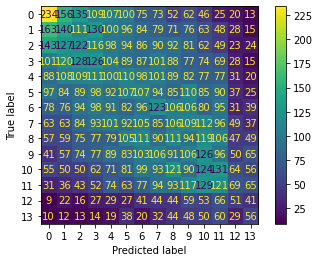

In [10]:
cm_dtc = confusion_matrix(test_label1, prediction_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtc)
disp.plot() 

## random forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                             warm_start=False, class_weight='balanced', ccp_alpha=0.0, max_samples=None)

rfc.fit(std_train,train_label1)

prediction_rfc = cross_val_predict(rfc, std_test,test_label1, groups=test_group1, cv=10, n_jobs=7)
print(classification_report(test_label1, prediction_rfc))

<ipython-input-11-d436f04fe5c0>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(std_train,train_label1)


              precision    recall  f1-score   support

           1       0.24      0.36      0.29      1207
           2       0.13      0.15      0.14      1204
           3       0.11      0.11      0.11      1207
           4       0.12      0.12      0.12      1207
           5       0.11      0.09      0.10      1201
           6       0.10      0.09      0.09      1200
           7       0.07      0.06      0.07      1195
           8       0.09      0.08      0.09      1195
           9       0.10      0.09      0.10      1179
          10       0.10      0.09      0.09      1164
          11       0.13      0.13      0.13      1147
          12       0.14      0.16      0.15      1064
          13       0.13      0.09      0.10       529
          14       0.17      0.12      0.14       445

    accuracy                           0.13     15144
   macro avg       0.12      0.13      0.12     15144
weighted avg       0.12      0.13      0.12     15144



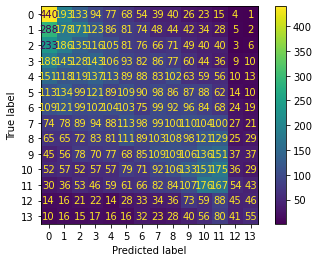

In [12]:
cm_rfc = confusion_matrix(test_label1, prediction_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc)
disp.plot() 

## stochastic gradient

In [13]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                     max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, 
                     random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                     early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, 
                     class_weight='balanced', warm_start=False, average=False)

sgdc.fit(std_train,train_label1)

prediction_sgdc = cross_val_predict(sgdc, std_test,test_label1, groups=test_group1, cv=10, n_jobs=7)
print(classification_report(test_label1, prediction_sgdc))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           1       0.14      0.18      0.16      1207
           2       0.10      0.06      0.08      1204
           3       0.11      0.11      0.11      1207
           4       0.09      0.17      0.12      1207
           5       0.09      0.10      0.10      1201
           6       0.08      0.07      0.08      1200
           7       0.09      0.06      0.07      1195
           8       0.08      0.05      0.06      1195
           9       0.10      0.07      0.08      1179
          10       0.10      0.05      0.07      1164
          11       0.10      0.07      0.08      1147
          12       0.10      0.11      0.10      1064
          13       0.08      0.15      0.10       529
          14       0.12      0.21      0.15       445

    accuracy                           0.10     15144
   macro avg       0.10      0.11      0.10     15144
weighted avg       0.10      0.10      0.09     15144



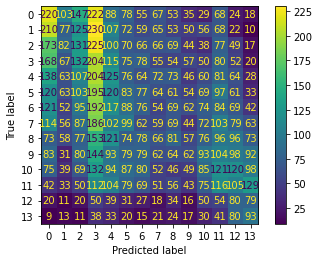

In [14]:
cm_sgdc = confusion_matrix(test_label1, prediction_sgdc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sgdc)
disp.plot() 

## support vector machine

In [15]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, 
                 multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight='balanced', 
                 verbose=0, random_state=None, max_iter=1000)

lsvc.fit(std_train,train_label1)

prediction_lsvc = cross_val_predict(lsvc, std_test,test_label1, groups=test_group1, cv=10, n_jobs=7)
print(classification_report(test_label1, prediction_lsvc))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           1       0.15      0.79      0.25      1207
           2       0.08      0.05      0.06      1204
           3       0.08      0.08      0.08      1207
           4       0.11      0.06      0.08      1207
           5       0.09      0.02      0.03      1201
           6       0.11      0.02      0.03      1200
           7       0.10      0.03      0.05      1195
           8       0.06      0.01      0.01      1195
           9       0.12      0.05      0.08      1179
          10       0.08      0.01      0.02      1164
          11       0.11      0.10      0.11      1147
          12       0.13      0.17      0.15      1064
          13       0.08      0.11      0.09       529
          14       0.13      0.43      0.20       445

    accuracy                           0.12     15144
   macro avg       0.10      0.14      0.09     15144
weighted avg       0.10      0.12      0.08     15144



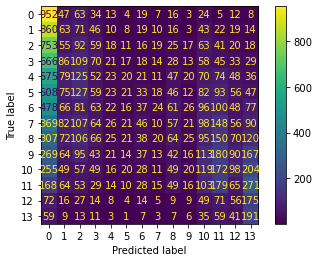

In [16]:
cm_lsvc = confusion_matrix(test_label1, prediction_lsvc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lsvc)
disp.plot() 

## passive agressive clf

In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, 
                                  validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=0, 
                                  loss='hinge', n_jobs=None, random_state=None, warm_start=False, 
                                  class_weight='balanced', average=False)

pac.fit(std_train,train_label1)

prediction_pac = cross_val_predict(pac, std_test,test_label1, groups=test_group1, cv=10, n_jobs=7)
print(classification_report(test_label1, prediction_pac))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           1       0.12      0.17      0.14      1207
           2       0.12      0.08      0.10      1204
           3       0.07      0.04      0.06      1207
           4       0.09      0.06      0.08      1207
           5       0.08      0.07      0.07      1201
           6       0.10      0.12      0.11      1200
           7       0.08      0.09      0.08      1195
           8       0.08      0.07      0.08      1195
           9       0.08      0.05      0.06      1179
          10       0.08      0.05      0.06      1164
          11       0.09      0.12      0.10      1147
          12       0.09      0.08      0.09      1064
          13       0.07      0.17      0.10       529
          14       0.08      0.13      0.10       445

    accuracy                           0.09     15144
   macro avg       0.09      0.09      0.09     15144
weighted avg       0.09      0.09      0.09     15144



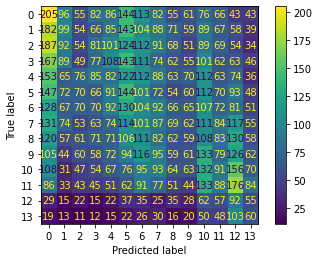

In [18]:
cm_pac = confusion_matrix(test_label1, prediction_pac)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pac)
disp.plot() 

## ridge

In [19]:
from sklearn.linear_model import RidgeClassifier

rdgc = RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, 
                       tol=0.001, class_weight='balanced', solver='auto', random_state=None)

rdgc.fit(std_train,train_label1)

prediction_rdgc = cross_val_predict(rdgc, std_test,test_label1, groups=test_group1, cv=10, n_jobs=7)
print(classification_report(test_label1, prediction_rdgc))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           1       0.14      0.73      0.23      1207
           2       0.08      0.04      0.05      1204
           3       0.09      0.10      0.09      1207
           4       0.12      0.08      0.10      1207
           5       0.09      0.02      0.03      1201
           6       0.08      0.01      0.02      1200
           7       0.10      0.02      0.04      1195
           8       0.08      0.01      0.02      1195
           9       0.12      0.06      0.08      1179
          10       0.04      0.00      0.01      1164
          11       0.13      0.08      0.10      1147
          12       0.13      0.15      0.14      1064
          13       0.08      0.14      0.10       529
          14       0.13      0.44      0.20       445

    accuracy                           0.12     15144
   macro avg       0.10      0.13      0.09     15144
weighted avg       0.10      0.12      0.08     15144



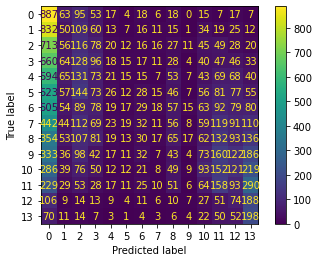

In [20]:
cm_rdgc = confusion_matrix(test_label1, prediction_rdgc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rdgc)
disp.plot() 

## hist grad boost

In [21]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier(loss='auto', learning_rate=0.1, max_iter=100, 
                                      max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, 
                                      l2_regularization=0.0, max_bins=255, 
                                      monotonic_cst=None, warm_start=False, early_stopping='auto', 
                                      scoring='loss', validation_fraction=0.1, n_iter_no_change=10, 
                                      tol=1e-07, verbose=0, random_state=None)

hgbc.fit(std_train,train_label1)

prediction_hgbc = cross_val_predict(hgbc, std_test,test_label1, groups=test_group1, cv=10, n_jobs=7)
print(classification_report(test_label1, prediction_hgbc))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           1       0.24      0.41      0.31      1207
           2       0.12      0.13      0.13      1204
           3       0.10      0.12      0.11      1207
           4       0.11      0.11      0.11      1207
           5       0.10      0.08      0.09      1201
           6       0.10      0.08      0.09      1200
           7       0.11      0.07      0.09      1195
           8       0.12      0.09      0.11      1195
           9       0.10      0.08      0.09      1179
          10       0.10      0.09      0.09      1164
          11       0.13      0.18      0.15      1147
          12       0.14      0.18      0.16      1064
          13       0.13      0.09      0.11       529
          14       0.17      0.14      0.15       445

    accuracy                           0.13     15144
   macro avg       0.13      0.13      0.13     15144
weighted avg       0.13      0.13      0.13     15144



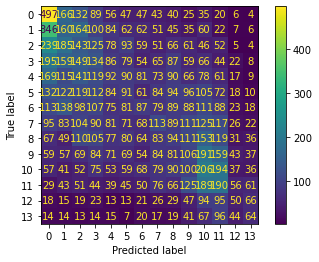

In [22]:
cm_hgbc = confusion_matrix(test_label1, prediction_hgbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_hgbc)
disp.plot() 

## result comparison

In [25]:
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_nn).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_gbc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_dtc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_rfc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_sgdc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_lsvc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_pac).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_rdgc).plot()
ConfusionMatrixDisplay(confusion_matrix=cm_hgbc).plot()

NameError: name 'cm_logreg' is not defined